In [42]:
import jsonlines
from collections import defaultdict
import tqdm

In [43]:
# import argparse
# parser = argparse.ArgumentParser(description='Description of your program')
# parser.add_argument('input_file')
# args = parser.parse_args()

In [44]:
from types import SimpleNamespace
args = SimpleNamespace()
args.input_file = "/home/XXX/code/bug-benchmarks/oss-fuzz/first_run_xmls_dedup_sort.jsonl"
# args.input_file = "/mnt/magi/basilisk-backup/Files/biggie/oss-fuzz/fuzz_10m_trace_3h/postprocessed_json/examples_sorted_clean.jsonl"

In [45]:
with open(args.input_file) as inf:
    num_lines = sum(1 for _ in inf)

with jsonlines.open(args.input_file) as inf:
    project_examples = []
    current_project = None
    projects = defaultdict(int)
    classes = defaultdict(int)
    for example in tqdm.tqdm(inf, total=num_lines, desc="measuring stats"):
        projects[example["project"]] += 1
        classes[example["class"]] += 1

measuring stats: 100%|██████████| 495021/495021 [00:20<00:00, 23818.76it/s]


In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

unique projects: 76


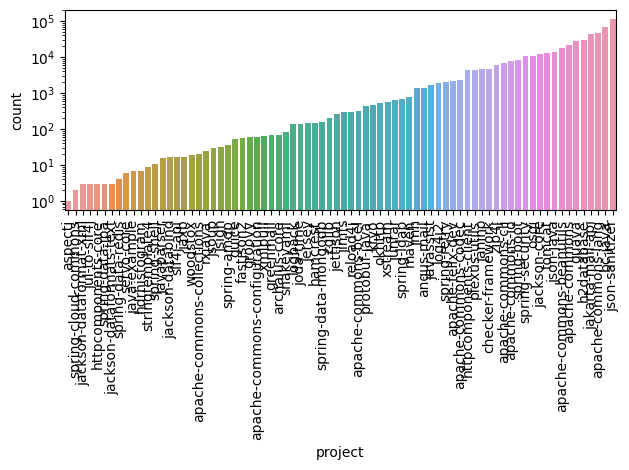

project
angus-mail               0.013158
log4j2                   0.013158
reload4j                 0.013158
protobuf-java            0.013158
plexus-utils             0.013158
                           ...   
httpcomponents-client    0.013158
hdrhistogram             0.013158
hamcrest                 0.013158
h2database               0.013158
zip4j                    0.013158
Length: 76, dtype: float64

In [47]:
print("unique projects:", len(projects))
df = pd.DataFrame(projects.items(), columns=["project", "count"]).sort_values("count")
sns.barplot(df, x="project", y="count")
plt.yscale("log")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df.value_counts("project", normalize=True)

unique classes: 810


<ipython-input-54-ecd2774454ad>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


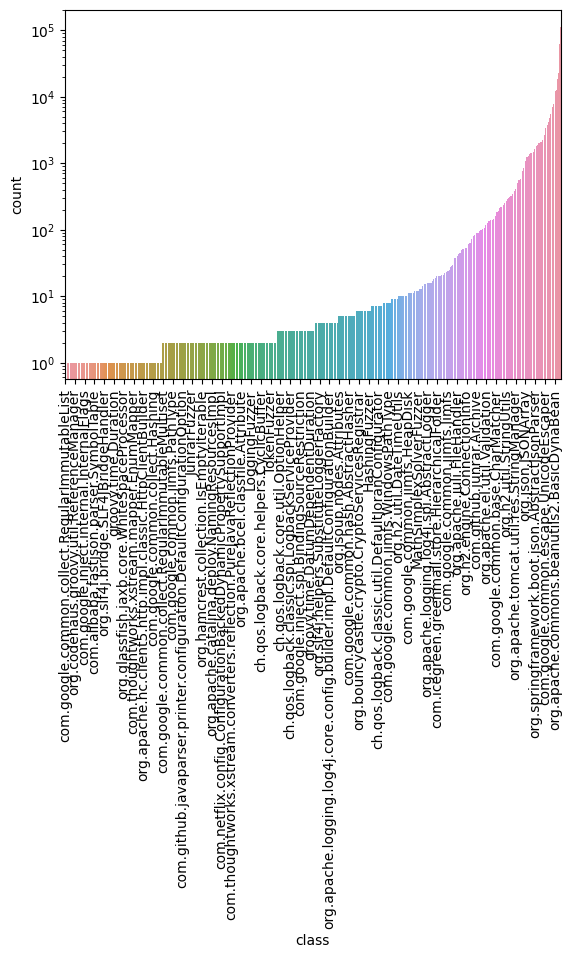

class
ASCIIUtilityFuzzer                                                           0.001235
org.apache.logging.log4j.core.config.builder.impl.DefaultComponentBuilder    0.001235
org.apache.log4j.Logger                                                      0.001235
org.apache.log4j.helpers.AppenderAttachableImpl                              0.001235
org.apache.log4j.helpers.COWArrayList                                        0.001235
                                                                               ...   
com.google.common.jimfs.HeapDisk                                             0.001235
com.google.common.jimfs.Jimfs                                                0.001235
com.google.common.jimfs.JimfsFileStore                                       0.001235
com.google.common.jimfs.JimfsFileSystem                                      0.001235
parseFuzzer                                                                  0.001235
Length: 810, dtype: float64

In [54]:
print("unique classes:", len(classes))
df = pd.DataFrame(classes.items(), columns=["class", "count"]).sort_values("count").reset_index(drop=True)
sns.barplot(df, x="class", y="count")
plt.yscale("log")
selected_ticks = df["class"][::len(df)//50]
plt.gca().set_xticks(selected_ticks.index)
plt.gca().set_xticklabels(selected_ticks.tolist(), rotation='vertical')
plt.tight_layout()
plt.show()
df.value_counts("class", normalize=True)